# **Import Library yang dibutuhkan**

In [1]:
# Mengimport Library yang dibutuhkan

import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt

# Import Library yang dibutuhkan

from imblearn.over_sampling import SMOTE, ADASYN, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler, TomekLinks, ClusterCentroids
from imblearn.combine import SMOTEENN, SMOTETomek
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# **Load Dataset**

In [2]:
# Load Dataset

df = pd.read_csv("/content/drive/MyDrive/Dataset Ulasan Google Play/scrapped_data_Loklok_1.csv")
df.head()

,userName,score,at,content
0,Pengguna Google,5,2024-07-03 01:00:47,Good Job
1,Pengguna Google,3,2024-07-02 23:31:41,aplikasinya bagus cuman subtitle nya kadang ba...
2,Pengguna Google,1,2024-07-02 23:14:13,iklan nya banyak dan lama!! malesin!!!!!!
3,Pengguna Google,3,2024-07-02 20:00:33,sudah langganan vip tapi short film nya masih ...
4,Pengguna Google,5,2024-07-02 19:50:06,👍👍👍👍👍


In [3]:
# Menampilkan Column Content, Username, dan at.

df = df[['content']]
df

,content
0,Good Job
1,aplikasinya bagus cuman subtitle nya kadang ba...
2,iklan nya banyak dan lama!! malesin!!!!!!
3,sudah langganan vip tapi short film nya masih ...
4,👍👍👍👍👍
...,...
2495,Good
2496,Kenapa tidak bisa buat ruang pribadi untuk non...
2497,keren banget loklok
2498,q suka banget


In [4]:
# Memberikan Informasi terkait Dataset yang digunakan

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   content  2500 non-null   object
dtypes: object(1)
memory usage: 19.7+ KB


In [5]:
# Menghasilkan statistik deskriptif data dalam Pandas DataFrame atau Series.

df.describe()

,content
count,2500
unique,2037
top,bagus
freq,78


# **Pre - Processing**


1.   Cleaning Data
2.   Case Folding
3.   Normalization
4.   Stopword
5.   Tokenize
6.   Stemming
7.   Translate
8.   Labeling

# **Cleaning Data & Case Folding**

In [6]:
# Mengetahui jumlah berapa baris dan kolom.

df.shape

(2500, 1)

In [7]:
# Menghapus data yang duplicate

df = df.drop_duplicates(subset=['content'])

In [8]:
# Mengecek data yang duplikat

df.duplicated().sum()

0

In [9]:
# Menghapus data yang kosong

df = df.dropna()

In [10]:
# Memastikan tidak ada missing value yang tersisa.

df.isnull().sum()

content    0
dtype: int64

In [11]:
# Mengetahui jumlah berapa baris dan kolom setelahnya

df.shape

(2037, 1)

In [12]:
# Fungsi Cleaning Text

def clean_review_text(text): # Membuat Fungsi Cleaning Text
  text = re.sub(r"@[A-Za-z0-9_]+", "", text) # Menghapus Mention
  text = re.sub(r"#\w+", "", text) # Menghapus Hastag
  text = re.sub(r"https?://\S+", "", text) # Menghapus URL

  text = re.sub(r"[^A-Za-z0-9 ]", "", text) # Menghapus Karakter Non Alphanumeric
  text = re.sub(r"\s+", " ", text).strip() # Menghapus Spasi Berlebih
  text = re.sub(r"[0-9]+", "", text)

  return text

In [13]:
# Fungsi Hapus Emoji

def remove_emojis(data): # Membuat Fungsi Hapus Emoji
    emoj = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642"
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", re.UNICODE)
    return re.sub(emoj, '', data)

In [14]:
# Mengaplikasikan Fungsi Cleaning Text, Emoji, dan Case Folding yang sudah dibuat kedalam column 'content'

df['cleaning'] = df['content'].apply(clean_review_text, remove_emojis).str.lower()
df

,content,cleaning
0,Good Job,good job
1,aplikasinya bagus cuman subtitle nya kadang ba...,aplikasinya bagus cuman subtitle nya kadang ba...
2,iklan nya banyak dan lama!! malesin!!!!!!,iklan nya banyak dan lama malesin
3,sudah langganan vip tapi short film nya masih ...,sudah langganan vip tapi short film nya masih ...
4,👍👍👍👍👍,
...,...,...
2494,Good 👍👍👍,good
2496,Kenapa tidak bisa buat ruang pribadi untuk non...,kenapa tidak bisa buat ruang pribadi untuk nonton
2497,keren banget loklok,keren banget loklok
2498,q suka banget,q suka banget


# **Normalization**

In [15]:
# Normalisasi

norm = {"yg" : "yang",
        "nyri" : "nyari",
        "cvvk" : "",
        "aplk" : "aplikasi",
        "non ton": "nonton",
        "jg" : "juga",
        "jd" : "jadi",
        "woila" : "",
        "mendem" : "tertekan",
        "sepertiurangan" : "",
        "jgn" : "jangan",
        "gajelas" : "tidak jelas",
        "pantes" : "pantas",
        "aelah" : "",
        "geratis" : "gratis",
        "rawwwwwwwwwwwwwrrrrrrrrr" : "",
        "doanload" : "download",
        "ngebag" : "ngebug",
        "ttk" : "Tiktok",
        "elor" : "error",
        "aee kos www www sz" : "",
        "nasdgm" : "",
        "sekalisaya" : "sekali saya",
        "007" : "",
        "grafick" : "grafik",
        "bngt" : "banget",
        "sheebal" : "sebal",
        "kemare" : "kemarin",
        "dislek" : "dislike",
        "bguss" : "bagus",
        "yyuy" : "",
        "sakarag" : "sekarang",
        "aflikasi" : "aplikasi",
        "sengkap" : "lengkap",
        "mntapp" : "mantap",
        "lncar" : "lancar",
       }

def normalisasi(str_text):
  for i in norm:
    str_text = str_text.replace(i, norm[i])
  return str_text

df['normalization'] = df['cleaning'].apply(lambda x: normalisasi(x))
df

,content,cleaning,normalization
0,Good Job,good job,good job
1,aplikasinya bagus cuman subtitle nya kadang ba...,aplikasinya bagus cuman subtitle nya kadang ba...,aplikasinya bagus cuman subtitle nya kadang ba...
2,iklan nya banyak dan lama!! malesin!!!!!!,iklan nya banyak dan lama malesin,iklan nya banyak dan lama malesin
3,sudah langganan vip tapi short film nya masih ...,sudah langganan vip tapi short film nya masih ...,sudah langganan vip tapi short film nya masih ...
4,👍👍👍👍👍,,
...,...,...,...
2494,Good 👍👍👍,good,good
2496,Kenapa tidak bisa buat ruang pribadi untuk non...,kenapa tidak bisa buat ruang pribadi untuk nonton,kenapa tidak bisa buat ruang pribadi untuk nonton
2497,keren banget loklok,keren banget loklok,keren banget loklok
2498,q suka banget,q suka banget,q suka banget


# **Stopwords**

In [16]:
# Menginstall Library Sastrawi

!pip install Sastrawi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 4.4 MB/s eta 0:00:00


In [17]:
# Stopwords

import Sastrawi
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory, StopWordRemover, ArrayDictionary
more_stop_words = ["dengan", "tidak", "aku", "engkau", "kamu", "beliau", "kalian", "kita", "sini", "situ", "sana",
                   "begini", "bapak", "ibu", "saudara", "tuan", "nyonya", "nona", "siapa", "apa", "mana", "kapan",
                   "bagaimana", "meski", "walaupun", "seandainya", "andai", "jikalau", "kini", "dulu", "sekarang",
                   "tadi", "besok", "lusa", "satu", "tiga", "pertama", "kedua", "ketiga", "sangat", "sekali", "terlalu",
                   "cukup", "lah", "tah", "yang", "nya", "untuk"]

stop_words = StopWordRemoverFactory().get_stop_words()
new_array = ArrayDictionary(more_stop_words)
stop_words_remover_new = StopWordRemover(new_array)

def stopwords(str_text):
  str_text = stop_words_remover_new.remove(str_text)
  return str_text

df['stopwords'] = df['normalization'].apply(lambda x: stopwords(x))
df

,content,cleaning,normalization,stopwords
0,Good Job,good job,good job,good job
1,aplikasinya bagus cuman subtitle nya kadang ba...,aplikasinya bagus cuman subtitle nya kadang ba...,aplikasinya bagus cuman subtitle nya kadang ba...,aplikasinya bagus cuman subtitle kadang bahasa...
2,iklan nya banyak dan lama!! malesin!!!!!!,iklan nya banyak dan lama malesin,iklan nya banyak dan lama malesin,iklan banyak dan lama malesin
3,sudah langganan vip tapi short film nya masih ...,sudah langganan vip tapi short film nya masih ...,sudah langganan vip tapi short film nya masih ...,sudah langganan vip tapi short film masih haru...
4,👍👍👍👍👍,,,
...,...,...,...,...
2494,Good 👍👍👍,good,good,good
2496,Kenapa tidak bisa buat ruang pribadi untuk non...,kenapa tidak bisa buat ruang pribadi untuk nonton,kenapa tidak bisa buat ruang pribadi untuk nonton,kenapa bisa buat ruang pribadi untuk nonton
2497,keren banget loklok,keren banget loklok,keren banget loklok,keren banget loklok
2498,q suka banget,q suka banget,q suka banget,q suka banget


# **Tokenize**

In [18]:
# Tokenize

df['tokenized'] = df['stopwords'].apply(lambda x:x.split())
df

,content,cleaning,normalization,stopwords,tokenized
0,Good Job,good job,good job,good job,"[good, job]"
1,aplikasinya bagus cuman subtitle nya kadang ba...,aplikasinya bagus cuman subtitle nya kadang ba...,aplikasinya bagus cuman subtitle nya kadang ba...,aplikasinya bagus cuman subtitle kadang bahasa...,"[aplikasinya, bagus, cuman, subtitle, kadang, ..."
2,iklan nya banyak dan lama!! malesin!!!!!!,iklan nya banyak dan lama malesin,iklan nya banyak dan lama malesin,iklan banyak dan lama malesin,"[iklan, banyak, dan, lama, malesin]"
3,sudah langganan vip tapi short film nya masih ...,sudah langganan vip tapi short film nya masih ...,sudah langganan vip tapi short film nya masih ...,sudah langganan vip tapi short film masih haru...,"[sudah, langganan, vip, tapi, short, film, mas..."
4,👍👍👍👍👍,,,,[]
...,...,...,...,...,...
2494,Good 👍👍👍,good,good,good,[good]
2496,Kenapa tidak bisa buat ruang pribadi untuk non...,kenapa tidak bisa buat ruang pribadi untuk nonton,kenapa tidak bisa buat ruang pribadi untuk nonton,kenapa bisa buat ruang pribadi untuk nonton,"[kenapa, bisa, buat, ruang, pribadi, untuk, no..."
2497,keren banget loklok,keren banget loklok,keren banget loklok,keren banget loklok,"[keren, banget, loklok]"
2498,q suka banget,q suka banget,q suka banget,q suka banget,"[q, suka, banget]"


# **Stemming**

In [19]:
# Steamming

from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

def stemming(text_cleaning):
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
    stemmed_words = [stemmer.stem(w) for w in text_cleaning]
    return " ".join(stemmed_words)

df['steamming'] = df['tokenized'].apply(stemming)

df['steamming'].to_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_steamming_Loklok_1.csv', index = False)


In [20]:
df_steamming = pd.read_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_steamming_Loklok_1.csv', encoding = 'latin1')
df_steamming

,steamming
0,good job
1,aplikasi bagus cuman subtitle kadang bahasa in...
2,iklan banyak dan lama malesin
3,sudah langgan vip tapi short film masih harus ...
4,NaN
...,...
2032,good
2033,kenapa bisa buat ruang pribadi untuk nonton
2034,keren banget loklok
2035,q suka banget


# **Translate**

In [21]:
# Menginstall Library easynmt

!pip install -U easynmt

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 3.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3

In [22]:
import pandas as pd
from easynmt import EasyNMT

In [23]:
# Load Data Hasil Stemming

df_steamming = pd.read_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_steamming_Loklok_1.csv', encoding = 'latin1')


In [24]:
# Menentukan Asal & Target Bahasa yang akan diterjemahkan

source_lang = 'id'  # Replace with the source language of your data
target_lang = 'en'  # Replace with the target language

In [25]:
model = EasyNMT('opus-mt')  # You can choose a different model name here

11.9kB [00:00, 7.07MB/s]                   


In [26]:
# Imputing NaN Values

df_values = df_steamming.fillna(method = 'pad')
df_values

,steamming
0,good job
1,aplikasi bagus cuman subtitle kadang bahasa in...
2,iklan banyak dan lama malesin
3,sudah langgan vip tapi short film masih harus ...
4,sudah langgan vip tapi short film masih harus ...
...,...
2032,good
2033,kenapa bisa buat ruang pribadi untuk nonton
2034,keren banget loklok
2035,q suka banget


In [27]:
# Mengaplikasikan Fungsi Translate yang sudah dibuat kedalam column 'content'

df_values['steamming_en'] = df_values['steamming'].apply(lambda x: model.translate(x, source_lang=source_lang, target_lang=target_lang))
df_values.to_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_terjemahan_Loklok_1.csv')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/42.0 [00:00<?, ?B/s]

source.spm:   0%|          | 0.00/801k [00:00<?, ?B/s]

target.spm:   0%|          | 0.00/796k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.26M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/1.38k [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/models/marian/tokenization_marian.py:175: UserWarning: Recommended: pip install sacremoses.
  warnings.warn("Recommended: pip install sacremoses.")


pytorch_model.bin:   0%|          | 0.00/291M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/293 [00:00<?, ?B/s]

In [28]:
# Load Dataset Hasil Translate

df_values = pd.read_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_terjemahan_Loklok_1.csv')
df_values

,Unnamed: 0,steamming,steamming_en
0,0,good job,good job
1,1,aplikasi bagus cuman subtitle kadang bahasa in...,It's good. It's just subtitles sometimes English.
2,2,iklan banyak dan lama malesin,ads are many and old maresin
3,3,sudah langgan vip tapi short film masih harus ...,"It's been a VIP break, but short movies still ..."
4,4,sudah langgan vip tapi short film masih harus ...,"It's been a VIP break, but short movies still ..."
...,...,...,...
2032,2032,good,good
2033,2033,kenapa bisa buat ruang pribadi untuk nonton,Why can't we make a private room for the movies?
2034,2034,keren banget loklok,It's so cool. It's a shot.
2035,2035,q suka banget,I really like it.


# **Labeling**

In [29]:
# Load Dataset Hasil Translate

df_values = pd.read_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_terjemahan_Loklok_1.csv', index_col=0)
df_values


,steamming,steamming_en
0,good job,good job
1,aplikasi bagus cuman subtitle kadang bahasa in...,It's good. It's just subtitles sometimes English.
2,iklan banyak dan lama malesin,ads are many and old maresin
3,sudah langgan vip tapi short film masih harus ...,"It's been a VIP break, but short movies still ..."
4,sudah langgan vip tapi short film masih harus ...,"It's been a VIP break, but short movies still ..."
...,...,...
2032,good,good
2033,kenapa bisa buat ruang pribadi untuk nonton,Why can't we make a private room for the movies?
2034,keren banget loklok,It's so cool. It's a shot.
2035,q suka banget,I really like it.


In [30]:
# Menginstall Library Text-Blob, Worldcould, dan NLTK

!pip install tweet-preprocessor
!pip install textblob
!pip install wordcloud
!pip install nltk

In [31]:
# Import Library yang dibutuhkan

import preprocessor as p
from textblob import TextBlob
import nltk
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

nltk.download("punkt")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [32]:
# Labeling With TextBlob

data_review = list(df_values['steamming_en'])
polaritas = 0

status = []
total_positif = total_negatif = total_netral = total = 0

for i, review in enumerate(data_review):
    analysis = TextBlob(str(review))
    polaritas += analysis.polarity

    if analysis.sentiment.polarity > 0.0:
        total_positif += 1
        status.append("Positif")
    elif analysis.sentiment.polarity == 0.0:
        total_netral += 1
        status.append("Netral")
    else:
        total_negatif += 1
        status.append("Negatif")

    total += 1

print(f"Hasil Analisis Data :\nPositif = {total_positif}\nNetral = {total_netral}\nNegatif = {total_negatif}")
print(f"\nTotal Data Seluruhnya : {total}")

Hasil Analisis Data :
Positif = 1124
Netral = 747
Negatif = 166

Total Data Seluruhnya : 2037


In [33]:
# Melihat Status Sentimen

df_values['sentimen'] = status
df_values

,steamming,steamming_en,sentimen
0,good job,good job,Positif
1,aplikasi bagus cuman subtitle kadang bahasa in...,It's good. It's just subtitles sometimes English.,Positif
2,iklan banyak dan lama malesin,ads are many and old maresin,Positif
3,sudah langgan vip tapi short film masih harus ...,"It's been a VIP break, but short movies still ...",Netral
4,sudah langgan vip tapi short film masih harus ...,"It's been a VIP break, but short movies still ...",Netral
...,...,...,...
2032,good,good,Positif
2033,kenapa bisa buat ruang pribadi untuk nonton,Why can't we make a private room for the movies?,Netral
2034,keren banget loklok,It's so cool. It's a shot.,Positif
2035,q suka banget,I really like it.,Positif


In [34]:
# Mengimplementasikan Variabel Data Final

data_final = df_values

# **Visualization**


1.   Bar Plot
2.   Pie Chart
3.   Wordcloud



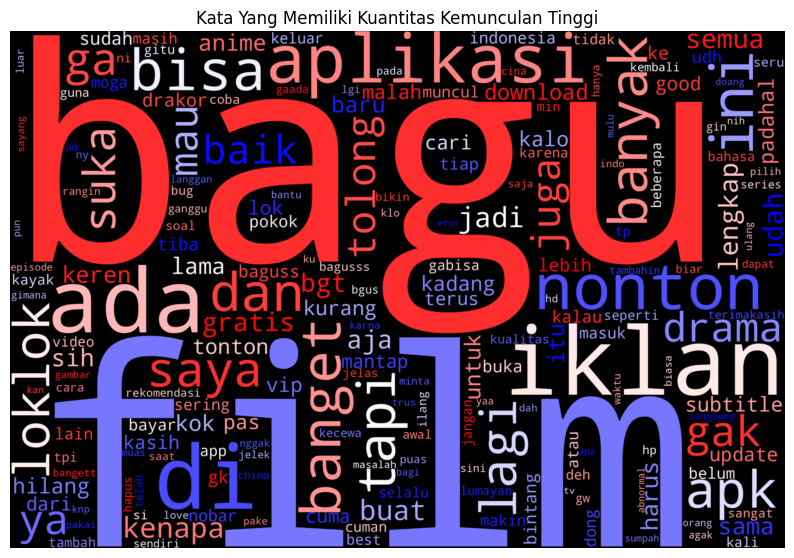

In [35]:
# Visualisasi Kata Yang Memiliki Kuantitas Kemunculan Paling Tinggi

import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

def plot_cloud(wordcloud):
    plt.figure(figsize=(10, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title('Kata Yang Memiliki Kuantitas Kemunculan Tinggi')
    plt.axis('off')
    plt.show()

all_words = ' '.join([reviews for reviews in data_final['steamming']])

wordcloud = WordCloud(width=3000,
                      height=2000,
                      random_state=3,
                      background_color='black',
                      colormap='bwr',
                      collocations=False,
                      stopwords=STOPWORDS).generate(all_words)

plot_cloud(wordcloud)


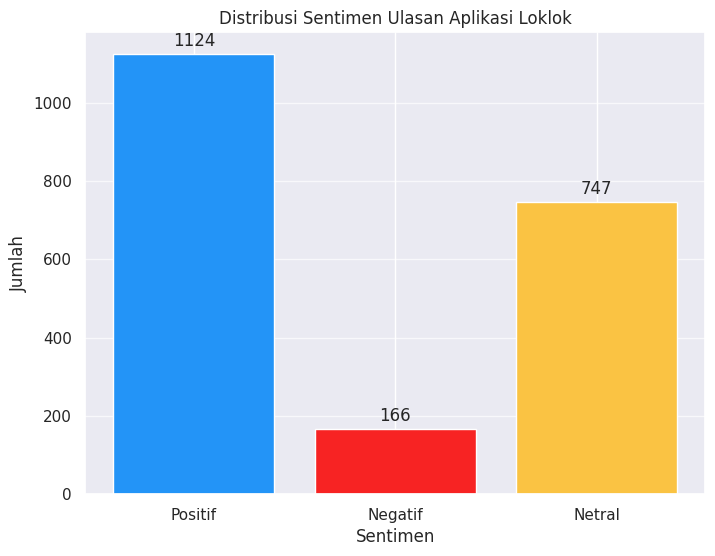

In [36]:
# Visualisasi Distribusi Sentimen Positif , Negatif , Netral Bar Plot

import seaborn as sns

sns.set_theme()

labels = ['Positif', 'Negatif', 'Netral']
counts = [total_positif, total_negatif, total_netral]

def show_bar_chart(labels, counts, title):
    fig, ax = plt.subplots(figsize=(8,6))
    bars = ax.bar(labels, counts, color=['#2394f7', '#f72323', '#fac343'])

    for bar, count in zip(bars, counts):
        height = bar.get_height()
        ax.annotate(f'{count}', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

    ax.grid(axis='y', linestyle='-', alpha=0.7)

    ax.set_xlabel('Sentimen')
    ax.set_ylabel('Jumlah')
    ax.set_title(title)

    plt.show()

show_bar_chart(labels, counts, "Distribusi Sentimen Ulasan Aplikasi Loklok")


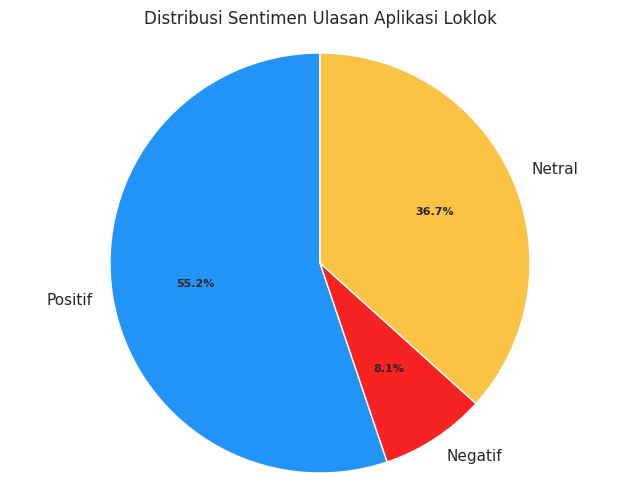

In [37]:
# Visualisasi Distribusi Sentimen Positif , Negatif , Netral Pie Chart

import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme()

labels = ['Positif', 'Negatif', 'Netral']
counts = [total_positif, total_negatif, total_netral]

def show_pie_chart(labels, counts, title):
    fig, ax = plt.subplots(figsize=(8, 6))

    # Customize colors for each wedge
    colors = ['#2394f7', '#f72323', '#fac343']

    # Create the pie chart
    wedges, texts, autotexts = ax.pie(counts, labels=labels, autopct='%1.1f%%',
                                      startangle=90, colors=colors)

    # Customize the wedge properties
    ax.axis('equal')  # Equal aspect ratio ensures a circular pie chart
    plt.setp(autotexts, size=8, weight='bold')

    # Add a title
    ax.set_title(title)

    plt.show()

# Call the pie chart function
show_pie_chart(labels, counts, "Distribusi Sentimen Ulasan Aplikasi Loklok")

In [38]:
# Menghapus Sentimen Netral

data_final = data_final[data_final['sentimen'] != 'Netral']
data_final

,steamming,steamming_en,sentimen
0,good job,good job,Positif
1,aplikasi bagus cuman subtitle kadang bahasa in...,It's good. It's just subtitles sometimes English.,Positif
2,iklan banyak dan lama malesin,ads are many and old maresin,Positif
5,trnslate masih acak,trnslate is still random,Negatif
6,keren,Cool.,Positif
...,...,...,...
2028,keren dan bgus bget,It's cool. It's great. It's great.,Positif
2030,bagus,Good.,Positif
2032,good,good,Positif
2034,keren banget loklok,It's so cool. It's a shot.,Positif


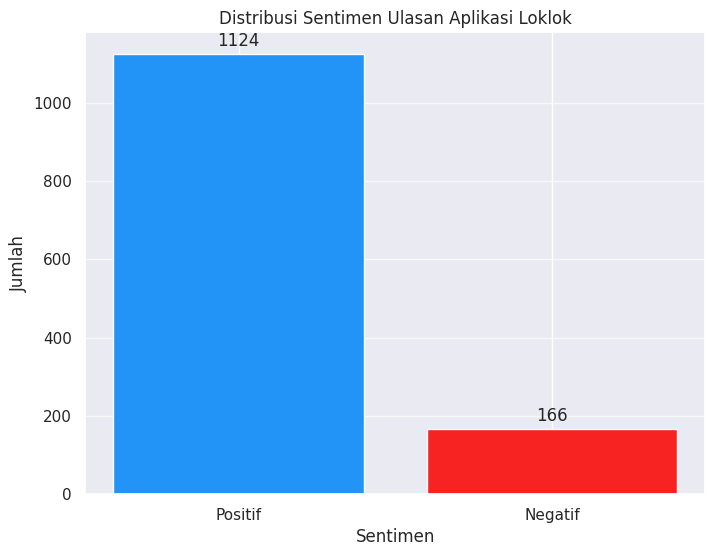

In [39]:
# Visualisasi Distribusi Sentimen Positif & Negatif Bar Plot

import seaborn as sns

sns.set_theme()

labels = ['Positif', 'Negatif']
counts = [total_positif, total_negatif]

def show_bar_chart(labels, counts, title):
    fig, ax = plt.subplots(figsize=(8,6))
    bars = ax.bar(labels, counts, color=['#2394f7', '#f72323'])

    for bar, count in zip(bars, counts):
        height = bar.get_height()
        ax.annotate(f'{count}', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

    ax.grid(axis='y', linestyle='-', alpha=0.7)

    ax.set_xlabel('Sentimen')
    ax.set_ylabel('Jumlah')
    ax.set_title(title)

    plt.show()

show_bar_chart(labels, counts, "Distribusi Sentimen Ulasan Aplikasi Loklok")


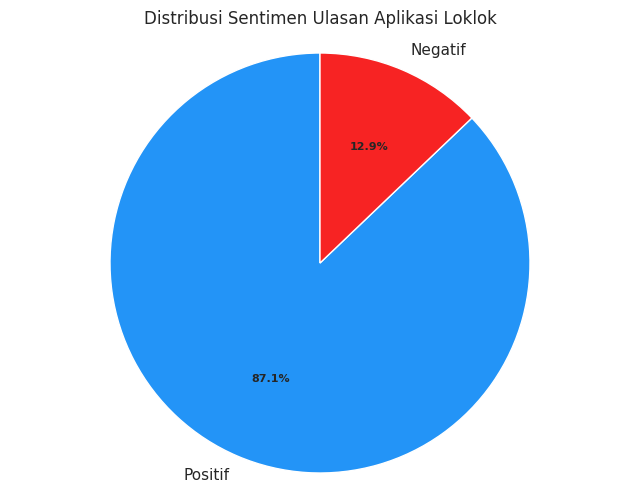

In [40]:
# Visualisasi Distribusi Sentimen Positif & Negatif Bar Pie Chart

import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme()

labels = ['Positif', 'Negatif']
counts = [total_positif, total_negatif]

def show_pie_chart(labels, counts, title):
    fig, ax = plt.subplots(figsize=(8, 6))

    # Customize colors for each wedge
    colors = ['#2394f7', '#f72323', '#fac343']

    # Create the pie chart
    wedges, texts, autotexts = ax.pie(counts, labels=labels, autopct='%1.1f%%',
                                      startangle=90, colors=colors)

    # Customize the wedge properties
    ax.axis('equal')  # Equal aspect ratio ensures a circular pie chart
    plt.setp(autotexts, size=8, weight='bold')

    # Add a title
    ax.set_title(title)

    plt.show()

# Call the pie chart function
show_pie_chart(labels, counts, "Distribusi Sentimen Ulasan Aplikasi Loklok")

In [41]:
# Replace Data Sentimen

data_final = data_final.replace({'Positif':0, 'Negatif':1})
data_final

,steamming,steamming_en,sentimen
0,good job,good job,0
1,aplikasi bagus cuman subtitle kadang bahasa in...,It's good. It's just subtitles sometimes English.,0
2,iklan banyak dan lama malesin,ads are many and old maresin,0
5,trnslate masih acak,trnslate is still random,1
6,keren,Cool.,0
...,...,...,...
2028,keren dan bgus bget,It's cool. It's great. It's great.,0
2030,bagus,Good.,0
2032,good,good,0
2034,keren banget loklok,It's so cool. It's a shot.,0


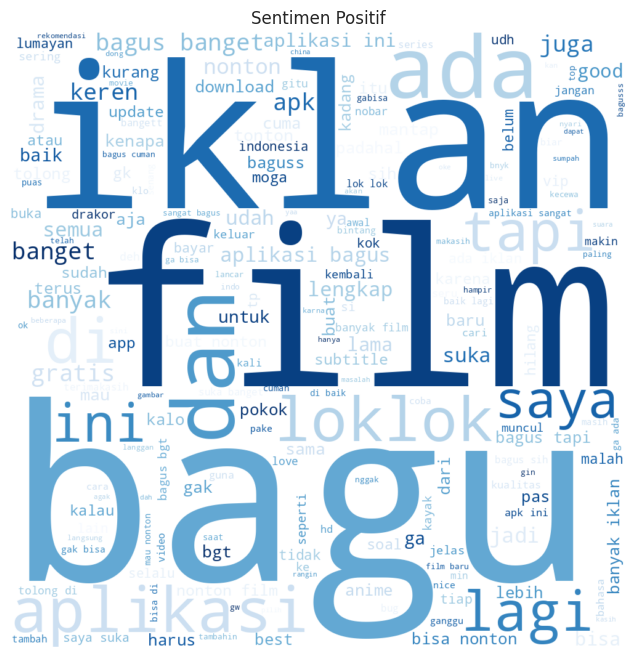

In [42]:
# Visualisasi Wordcould Positif & Negatif

data_positif = data_final[data_final['sentimen'] == 0]
data_negatif = data_final[data_final['sentimen'] == 1]

# Sentimen Positif

all_words = ' '.join([reviews for reviews in data_positif['steamming']])
wordcloud = WordCloud(colormap='Blues', width=1000, height=1000, mode='RGBA', background_color='white').generate(all_words)
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Sentimen Positif")
plt.margins(x=0, y=0)
plt.show()

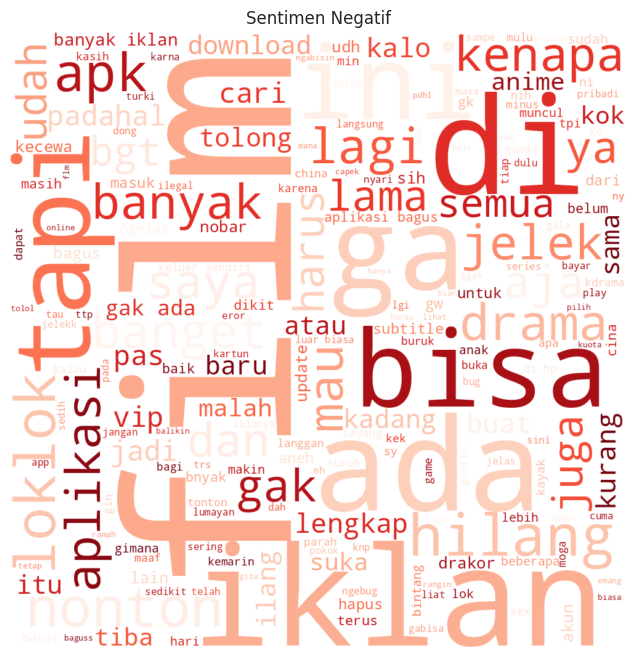

In [43]:
# Sentimen Negatif

all_words = ' '.join([reviews for reviews in data_negatif['steamming']])
wordcloud = WordCloud(colormap='Reds', width=1000, height=1000, mode='RGBA', background_color='white').generate(all_words)
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Sentimen Negatif")
plt.margins(x=0, y=0)
plt.show()

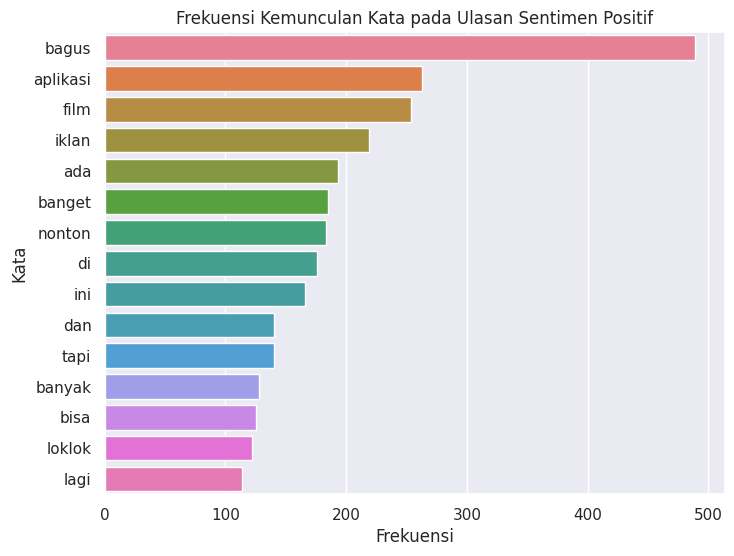

In [44]:
# Frekuensi Kemunculan Kata pada Ulasan Sentimen Positif

# Memfilter ulasan dengan sentimen positif
positive_reviews = data_final[data_final['sentimen'] == 0]['steamming'].tolist()

# Menggunakan CountVectorizer untuk menghitung frekuensi kata
vectorizer = CountVectorizer(stop_words='english')  # Anda bisa menambahkan stop words lainnya jika perlu
word_counts = vectorizer.fit_transform(positive_reviews)
word_frequencies = dict(zip(vectorizer.get_feature_names_out(), word_counts.sum(axis=0).tolist()[0]))

# Mengubah dictionary menjadi dataframe untuk memudahkan visualisasi
word_freq_df = pd.DataFrame(word_frequencies.items(), columns=['kata', 'frekuensi']).sort_values(by='frekuensi', ascending=False)

# Membatasi ke N kata yang paling sering muncul
N = 15
top_words_positive = word_freq_df.head(N)

# Membuat bar plot menggunakan seaborn
plt.figure(figsize=(8, 6))
sns.barplot(x='frekuensi', y='kata', hue='kata', legend=False, data=top_words_positive)
plt.title('Frekuensi Kemunculan Kata pada Ulasan Sentimen Positif')
plt.xlabel('Frekuensi')
plt.ylabel('Kata')
plt.show()

In [45]:
# Jumlah detail kata yang sering muncul

print("Jumlah detail kata yang sering muncul pada ulasan sentimen positif : \n")
print(top_words_positive.to_string(index=False))

Jumlah detail kata yang sering muncul pada ulasan sentimen positif : 

    kata  frekuensi
   bagus        489
aplikasi        263
    film        254
   iklan        219
     ada        193
  banget        185
  nonton        183
      di        176
     ini        166
     dan        140
    tapi        140
  banyak        128
    bisa        125
  loklok        122
    lagi        114


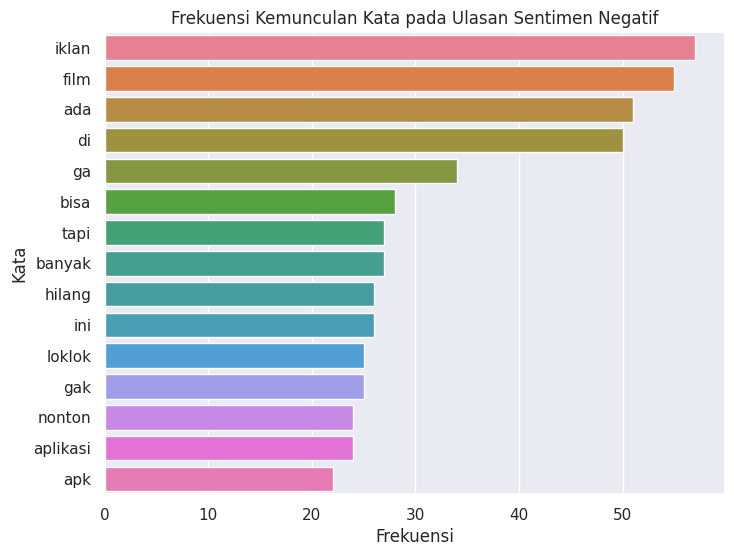

In [46]:
# Frekuensi Kemunculan Kata pada Ulasan Sentimen Negatif

# Memfilter ulasan dengan sentimen positif
negative_reviews = data_final[data_final['sentimen'] == 1]['steamming'].tolist()

# Menggunakan CountVectorizer untuk menghitung frekuensi kata
vectorizer = CountVectorizer(stop_words='english')  # Anda bisa menambahkan stop words lainnya jika perlu
word_counts = vectorizer.fit_transform(negative_reviews)
word_frequencies = dict(zip(vectorizer.get_feature_names_out(), word_counts.sum(axis=0).tolist()[0]))

# Mengubah dictionary menjadi dataframe untuk memudahkan visualisasi
word_freq_df = pd.DataFrame(word_frequencies.items(), columns=['kata', 'frekuensi']).sort_values(by='frekuensi', ascending=False)

# Membatasi ke N kata yang paling sering muncul
N = 15
top_words_negative = word_freq_df.head(N)

# Membuat bar plot menggunakan seaborn
plt.figure(figsize=(8, 6))
sns.barplot(x='frekuensi', y='kata', hue='kata', legend=False, data=top_words_negative)
plt.title('Frekuensi Kemunculan Kata pada Ulasan Sentimen Negatif')
plt.xlabel('Frekuensi')
plt.ylabel('Kata')
plt.show()

In [47]:
# Jumlah detail kata yang sering muncul

print("Jumlah detail kata yang sering muncul pada ulasan sentimen Negatif : \n")
print(top_words_negative.to_string(index=False))

Jumlah detail kata yang sering muncul pada ulasan sentimen Negatif : 

    kata  frekuensi
   iklan         57
    film         55
     ada         51
      di         50
      ga         34
    bisa         28
    tapi         27
  banyak         27
  hilang         26
     ini         26
  loklok         25
     gak         25
  nonton         24
aplikasi         24
     apk         22


In [48]:
# Menghitung Jumlah Sentimen Positif, Negatif

data_final['sentimen'].value_counts()

sentimen
0    1124
1     166
Name: count, dtype: int64

# **Transormation & Data Preparation**

In [49]:
# Memisahkan data menjadi data latih dan data uji [ Splitting Data ]

X = data_final['steamming']
y = data_final['sentimen']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [50]:
# Menggunakan TF - IDF Vectorizer untuk mengubah teks menjadi fitur numerik [ Text Vectorizer ]

vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [51]:
# Melakukan oversampling menggunakan Random Over-Sampling pada data latih

ros = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train_vec, y_train)


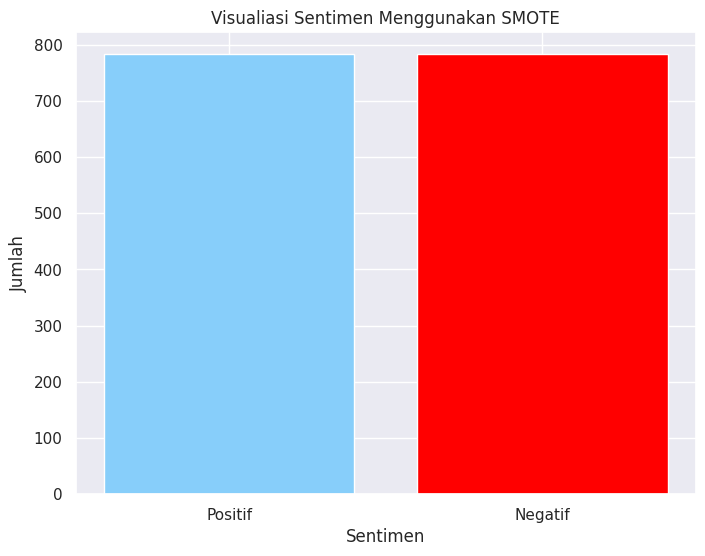

In [52]:
# Visualiasi data hasil resampling menggunakan SMOTE

sentimen_counts = y_train_resampled.value_counts()

plt.figure(figsize = (8, 6))
plt.bar(sentimen_counts.index, sentimen_counts.values, color = ['lightskyblue', 'red'])
plt.xlabel('Sentimen')
plt.ylabel('Jumlah')
plt.title('Visualiasi Sentimen Menggunakan SMOTE')
plt.xticks(sentimen_counts.index, ['Positif', 'Negatif'])
plt.show()

# **Data Mining**

In [53]:
# Import Library Warning
import warnings
warnings.filterwarnings('ignore')

In [54]:
# Membangun Model Naive Bayes Classifier

naive_bayes = MultinomialNB()
naive_bayes.fit(X_train_resampled, y_train_resampled)

MultinomialNB()

In [55]:
y_pred = naive_bayes.predict(X_test_vec)

# **Interpretation / Evaluation**


1.   Classification Report
2.   Confusion Matrix
3.   Classification Accuracy
4.   Classification Error




In [56]:
# Classification Report

# Evaluasi Model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred, target_names = ['Positif', 'Negatif'])

print("Akurasi Model Naive Bayes : ", accuracy)
print("\nLaporan Klasifikasi :\n", classification_rep)

Akurasi Model Naive Bayes :  0.8062015503875969

Laporan Klasifikasi :
               precision    recall  f1-score   support

     Positif       0.95      0.83      0.88       341
     Negatif       0.34      0.65      0.44        46

    accuracy                           0.81       387
   macro avg       0.64      0.74      0.66       387
weighted avg       0.87      0.81      0.83       387



In [57]:
# Confusion Matrix

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives (TP) = ', cm[0, 0])

print('\nTrue Negatives (TN) = ', cm[1, 1])

print('\nFalse Positives (FP) = ', cm[0, 1])

print('\nFalse Negatives (FN) = ', cm[1, 0])



print('\nAccuracy = ', accuracy)

Confusion matrix

 [[282  59]
 [ 16  30]]

True Positives (TP) =  282

True Negatives (TN) =  30

False Positives (FP) =  59

False Negatives (FN) =  16

Accuracy =  0.8062015503875969


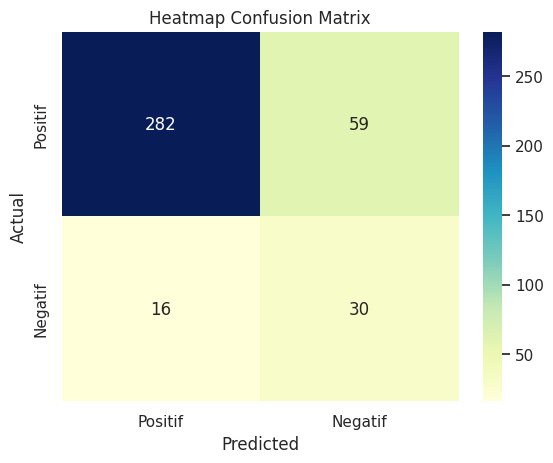

In [58]:
# Visualisasi Heatmap Confusion Matrix

cm_matrix = pd.DataFrame(data=cm, columns=['Positif','Negatif'],
                         index=['Positif','Negatif'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Heatmap Confusion Matrix')
plt.show()

In [59]:
# Slicing Confusion Matrix

TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]


In [60]:
# Classification Accuracy

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

Classification accuracy : 0.8062


In [61]:
# Classification Error

classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.1938


# **Testing**

In [63]:
# Contoh teks baru

new_text = input("\nMasukkan Teks Baru : ")
new_text_vec = vectorizer.transform([new_text])
predicted_sentimen = naive_bayes.predict(new_text_vec)
predicted_proba = naive_bayes.predict_proba(new_text_vec)

if predicted_sentimen[0] == 0:
    sentimen_label = "Positif"
    probability = predicted_proba[0][0] * 100
elif predicted_sentimen[0] == 1:
    sentimen_label = "Negatif"
    probability = predicted_proba[0][1] * 100

print("Hasil Analisis Sentimen Untuk Teks Baru:", sentimen_label)
print("Probabilitas: {:.2f}%".format(probability))
print("Probabilitas:", probability, "%")



Masukkan Teks Baru : Aplikasinya baguss gaada masalah sama sekalii, banyak banget variasi drama dan berbagai genre, tp kadang muncul iklannya banyak banget tp ttep bagus kok, semoga kedepannya lebih baik lagi aplikasinya..
Hasil Analisis Sentimen Untuk Teks Baru: Positif
Probabilitas: 67.07%
Probabilitas: 67.07359881261863 %


In [64]:
# Contoh teks baru

new_text = input("\nMasukkan Teks Baru : ")
new_text_vec = vectorizer.transform([new_text])
predicted_sentimen = naive_bayes.predict(new_text_vec)
predicted_proba = naive_bayes.predict_proba(new_text_vec)

if predicted_sentimen[0] == 0:
    sentimen_label = "Positif"
    probability = predicted_proba[0][0] * 100
elif predicted_sentimen[0] == 1:
    sentimen_label = "Negatif"
    probability = predicted_proba[0][1] * 100

print("Hasil Analisis Sentimen Untuk Teks Baru:", sentimen_label)
print("Probabilitas: {:.2f}%".format(probability))
print("Probabilitas:", probability, "%")



Masukkan Teks Baru : Kok bisa aplikasi ini kayak gini, aku sudah ambil VIP iklan, saat aku mau nonton ada iklannya lagi, katanya bebas iklan. Rugilah aku kalau kayak gini ceritanya, aku bela-belain pindah, eh malah mengecewakan kayak gini. Kalau begini aku unistal saja lah.
Hasil Analisis Sentimen Untuk Teks Baru: Negatif
Probabilitas: 61.01%
Probabilitas: 61.00798538820793 %
